# Page View Time Series Visualizer

### Assignment

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:
* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.


In [3]:
import pandas as pd
import numpy as p
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'])
df.set_index(['date'], inplace=True)
df.head(2)

,value
date,
2016-05-09,1201
2016-05-10,2329


### Data cleaning
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [4]:
dff = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]

## Data visualisation

### Creation of a line chart

* Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

In [308]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:title={'center':'Daily freeCodeCamp Forum Page Views 05/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

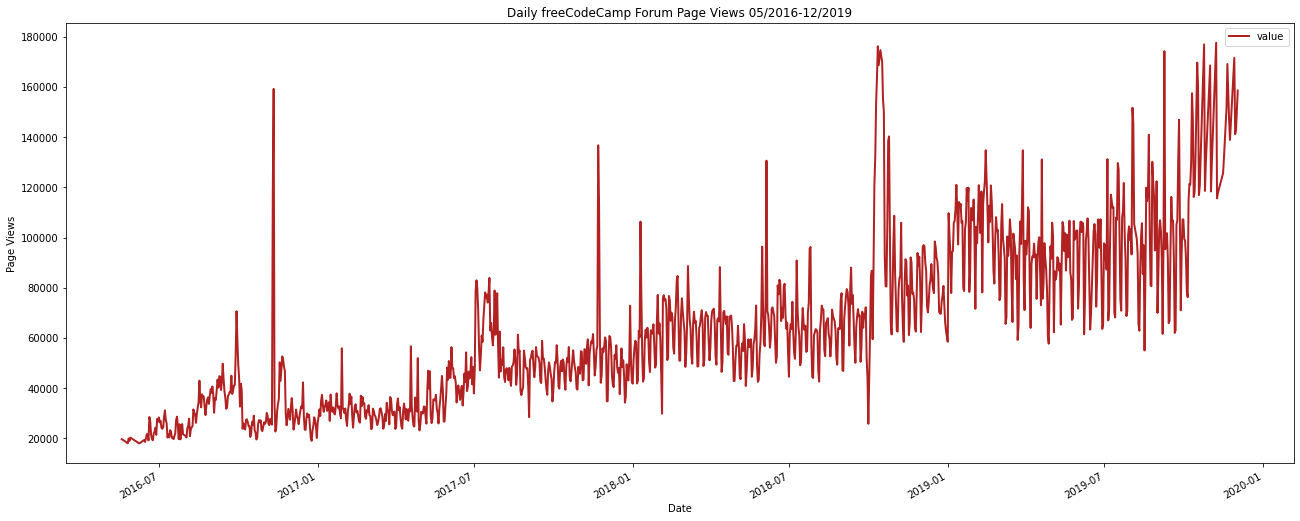

In [309]:
dff.plot(figsize=(22,9), color='firebrick', title='Daily freeCodeCamp Forum Page Views 05/2016-12/2019', xlabel='Date', ylabel='Page Views', linewidth=2)

### Bar Chart

* Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".


In [6]:
barplt = dff.copy()
barplt['month'] = barplt.index.month
barplt['year'] = barplt.index.year
barplt.reset_index()
barplt.head(2)

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016


Text(-15.075000000000003, 0.5, 'Average Page Views')

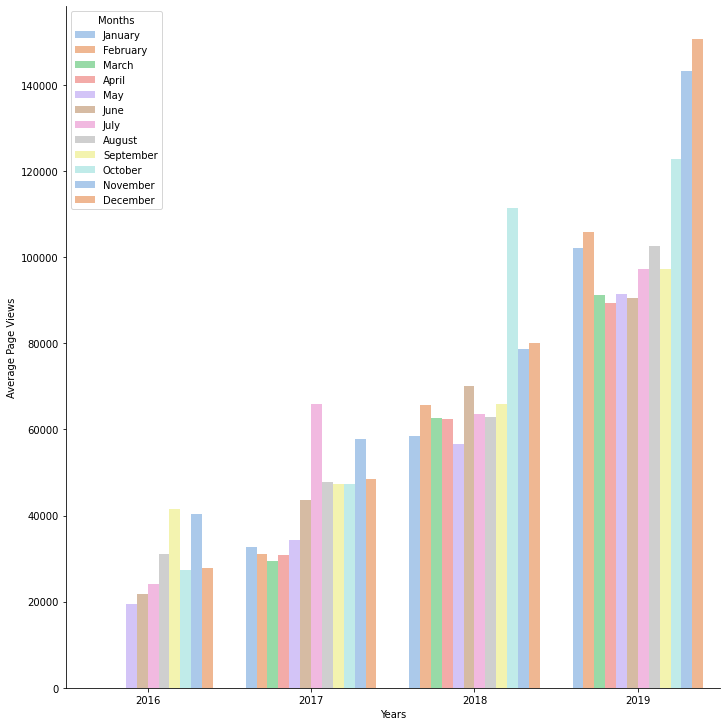

In [313]:
fig = sns.catplot(kind='bar', data=barplt, y='value', x='year', hue='month', ci=None, legend=None, height=10, palette='pastel')
plt.legend(labels=('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
                             'September', 'October', 'November', 'December'),
            loc='upper left', bbox_to_anchor=(0, 1), title="Months")
plt.xlabel("Years")
plt.ylabel("Average Page Views")


### Box plot

* Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [365]:
    df_box = barplt.copy()
    month_dict = { 1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec' }
    df_box['monthly'] = df_box['month'].map(month_dict)

In [366]:
df_box.head()

,value,month,year,monthly
date,,,,
2016-05-19,19736,5,2016,May
2016-05-26,18060,5,2016,May
2016-05-27,19997,5,2016,May
2016-05-28,19044,5,2016,May
2016-05-29,20325,5,2016,May


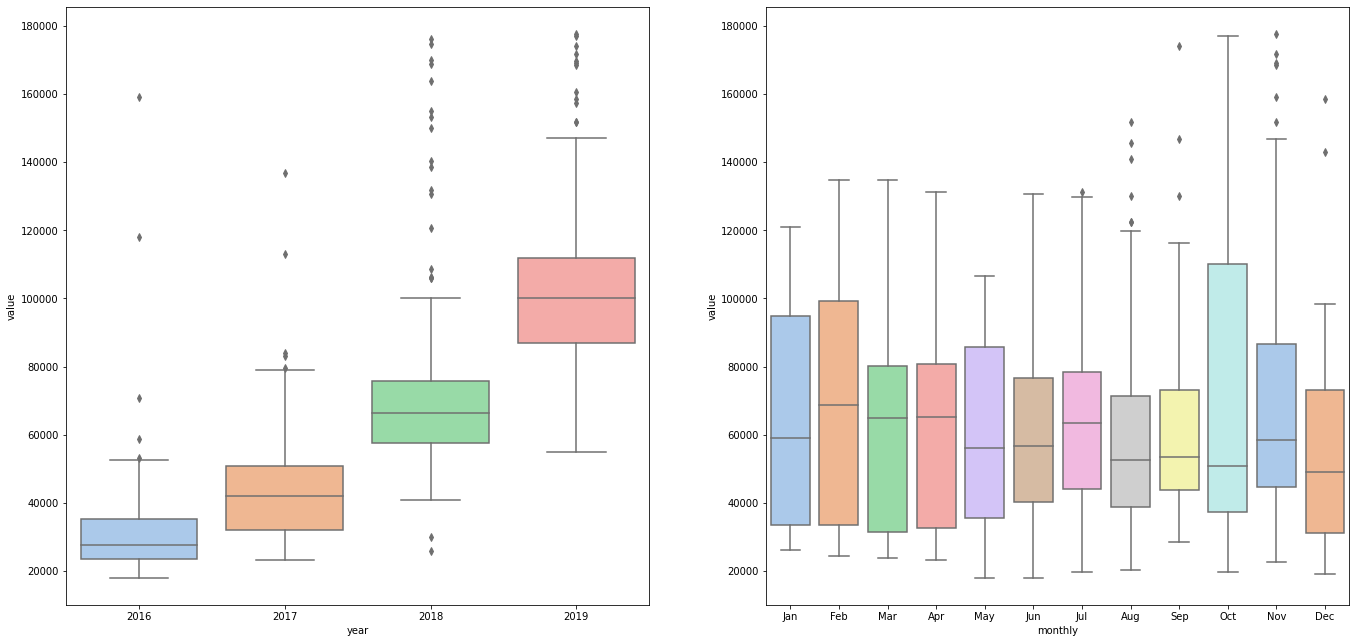

In [371]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(23)
fig.set_figheight(11)

ax1 = sns.boxplot(data=df_box, x='year', y='value', ax=ax1,palette='pastel')
ax2 = sns.boxplot(data=df_box, x='monthly', y='value', order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],palette='pastel')